In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)
X,y = make_circles(n_samples=500, factor=0.1, noise=0.35, random_state=2)

In [3]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=2)

In [4]:
X_train.shape

(400, 2)

In [5]:
X.shape

(500, 2)

In [6]:
import pandas as pd
df = pd.DataFrame(X, columns=['f1', 'f2'])
df['target'] = y


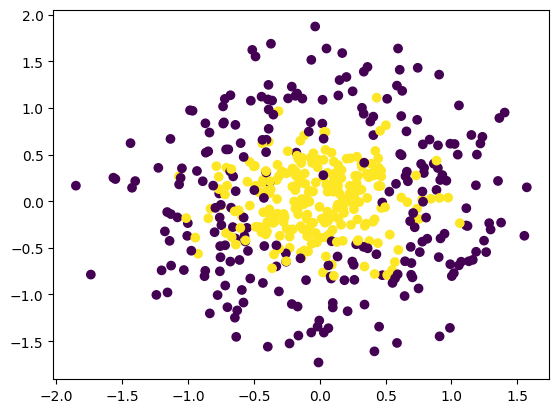

In [7]:
plt.scatter(X[:,0], X[:,1], c=y)

In [8]:
from sklearn.tree import DecisionTreeClassifier

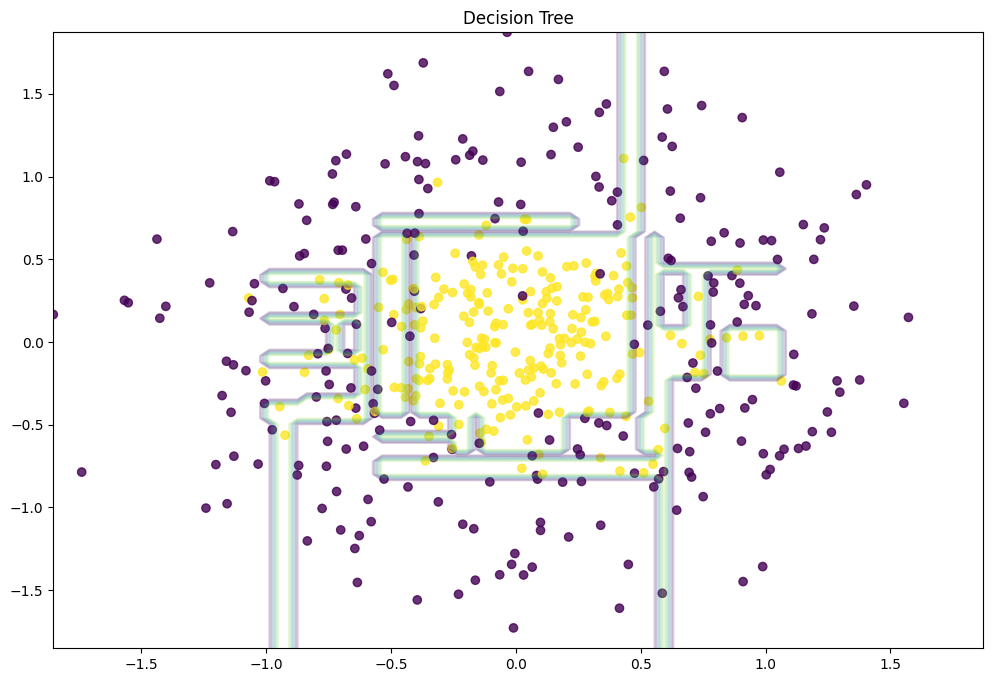

In [9]:
dtree = DecisionTreeClassifier(random_state=2)
dtree.fit(X_train, y_train)

plt.figure(figsize=(12,8))
X_range = np.linspace(X.min(), X.max(), 100)
XX1, XX2 = np.meshgrid(X_range, X_range)
y_hat = dtree.predict(np.c_[XX1.ravel(), XX2.ravel()])
y_hat = y_hat.reshape(XX1.shape)

plt.contour(XX1, XX2, y_hat, alpha=0.2)
plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis', alpha=0.8)
plt.title('Decision Tree')
plt.show()

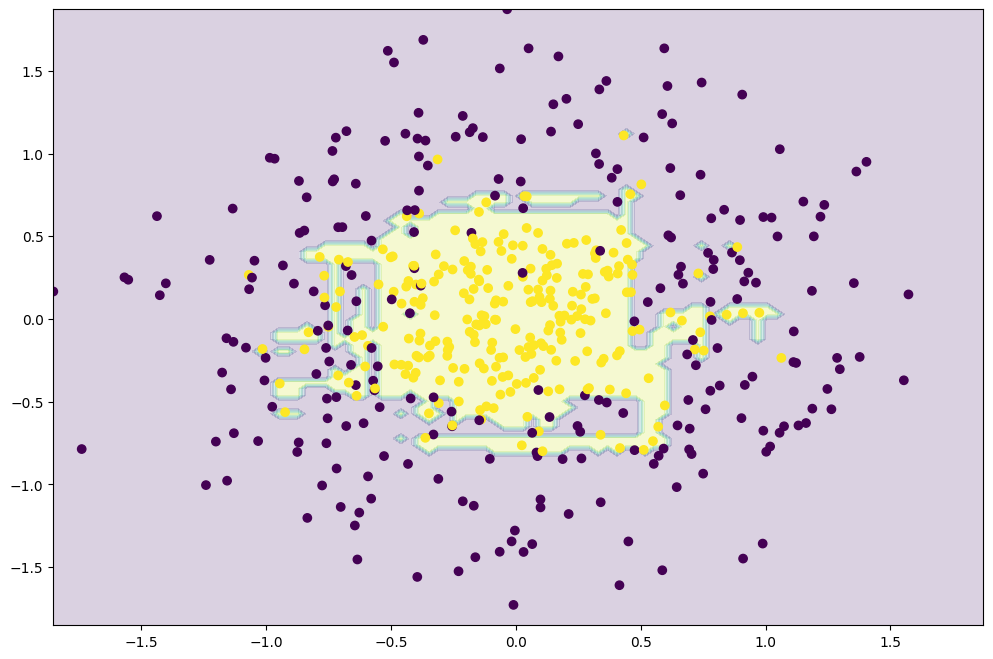

In [13]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=500, random_state=2)
rf.fit(X_train, y_train)

plt.figure(figsize=(12,8))
X_range = np.linspace(X.min(), X.max(), 100)
XX1, XX2 = np.meshgrid(X_range, X_range)
y_hat = rf.predict(np.c_[XX1.ravel(), XX2.ravel()])
y_hat = y_hat.reshape(XX1.shape)
plt.contourf(XX1, XX2, y_hat, alpha=0.2)
plt.scatter(X[:,0], X[:,1], c=y)

(-5.0, 5.0)

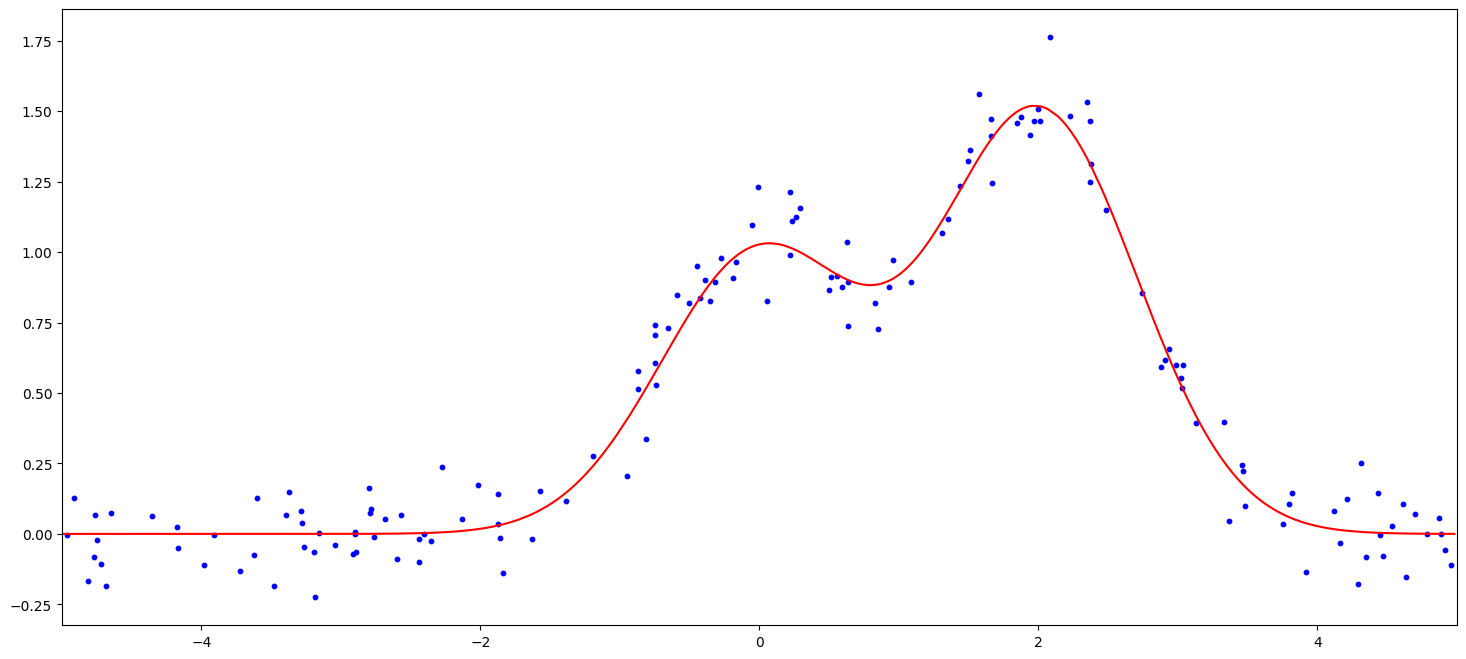

In [36]:
n_train = 150
n_test = 1000
noise = 0.1

# generate data
def f(x):
    x = x.ravel()
    return np.exp(-x**2)+1.5*np.exp(-(x-2)**2)

def generat(n_samples, noise):
    x = np.random.rand(n_samples)*10-5
    x = np.sort(x).ravel()
    y = np.exp(-x**2)+1.5*np.exp(-(x-2)**2) +np.random.normal(0.0, noise, n_samples)
    x = x.reshape(n_samples,1)

    return x, y

X_train, y_train = generat(n_samples=n_train, noise=noise)
X_test, y_test = generat(n_samples=n_test, noise=noise)

plt.figure(figsize=(18,8))
plt.plot(X_test, f(X_test), 'r')
plt.scatter(X_train, y_train, c='b', s=10)
plt.xlim([-5,5])


Text(0.5, 1.0, 'Decision tree MSE = 40.43')

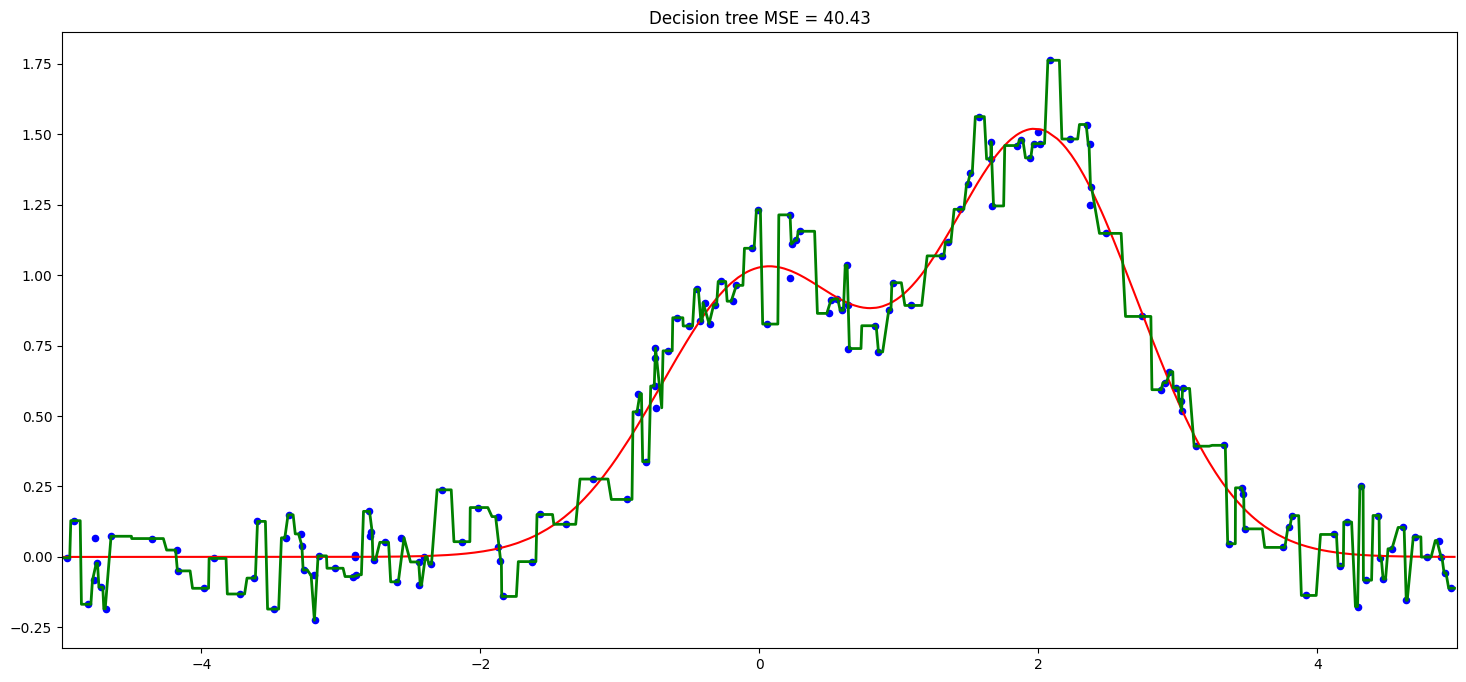

In [51]:
from sklearn.tree import DecisionTreeRegressor

dtree = DecisionTreeRegressor().fit(X_train, y_train)
d_predict = dtree.predict(X_test)

plt.figure(figsize=(18,8))
plt.plot(X_test, f(X_test), 'r')
plt.scatter(X_train, y_train, c='b', s=20)
plt.plot(X_test, d_predict, c='g', lw=2)
plt.xlim([-5,5])
plt.title('Decision tree MSE = %.2f'%np.sum(y_test - d_predict)**2)


In [53]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=1000).fit(X_train, y_train)
rf_predict = rfr.predict(X_test)

Text(0.5, 1.0, 'Random Forest, MSE = 34.13')

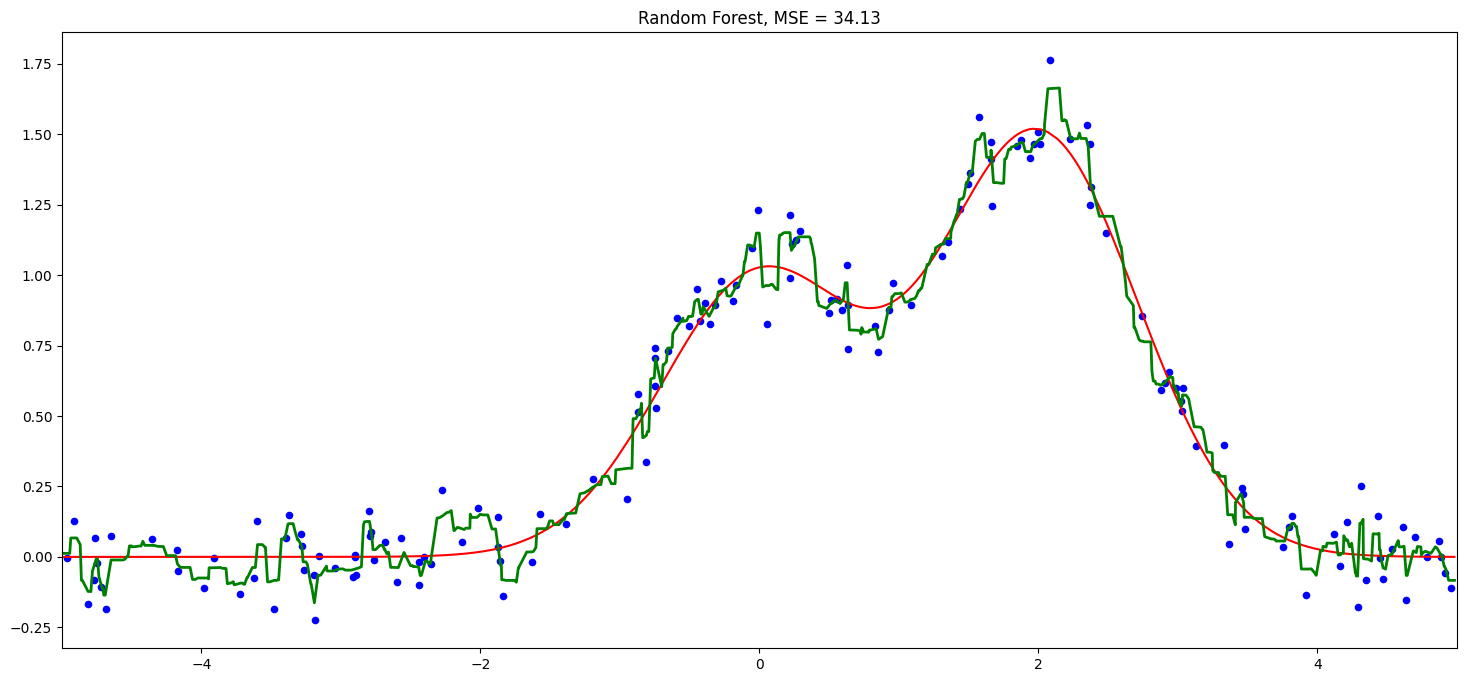

In [67]:
plt.figure(figsize=(18,8))
plt.plot(X_test, f(X_test), 'r')
plt.scatter(X_train, y_train, c='b', s=20)
plt.plot(X_test, rf_predict, 'g', lw=2)
plt.xlim([-5,5])
plt.title("Random Forest, MSE = %.2f" % np.sum(y_test - rf_predict)**2)